## Importações e Extração dos Dados via API

In [1]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [2]:
dados = yf.Ticker('^GSPC')

In [3]:
type(dados)

yfinance.ticker.Ticker

In [4]:
df = dados.history(period = 'max')

## Análise Exploratória dos Dados

In [5]:
df.shape

(24162, 7)

In [6]:
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0


In [7]:
df.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-03-04 00:00:00-05:00,5130.990234,5149.669922,5127.180176,5130.950195,4758440000,0.0,0.0
2024-03-05 00:00:00-05:00,5110.520020,5114.540039,5056.819824,5078.649902,4418410000,0.0,0.0
2024-03-06 00:00:00-05:00,5108.029785,5127.970215,5092.220215,5104.759766,4559050000,0.0,0.0
2024-03-07 00:00:00-05:00,5132.379883,5165.620117,5128.209961,5157.359863,4137980000,0.0,0.0
2024-03-08 00:00:00-05:00,5164.459961,5189.259766,5117.500000,5123.689941,4208870000,0.0,0.0


In [8]:
df.index

DatetimeIndex(['1927-12-30 00:00:00-05:00', '1928-01-03 00:00:00-05:00',
               '1928-01-04 00:00:00-05:00', '1928-01-05 00:00:00-05:00',
               '1928-01-06 00:00:00-05:00', '1928-01-09 00:00:00-05:00',
               '1928-01-10 00:00:00-05:00', '1928-01-11 00:00:00-05:00',
               '1928-01-12 00:00:00-05:00', '1928-01-13 00:00:00-05:00',
               ...
               '2024-02-26 00:00:00-05:00', '2024-02-27 00:00:00-05:00',
               '2024-02-28 00:00:00-05:00', '2024-02-29 00:00:00-05:00',
               '2024-03-01 00:00:00-05:00', '2024-03-04 00:00:00-05:00',
               '2024-03-05 00:00:00-05:00', '2024-03-06 00:00:00-05:00',
               '2024-03-07 00:00:00-05:00', '2024-03-08 00:00:00-05:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=24162, freq=None)

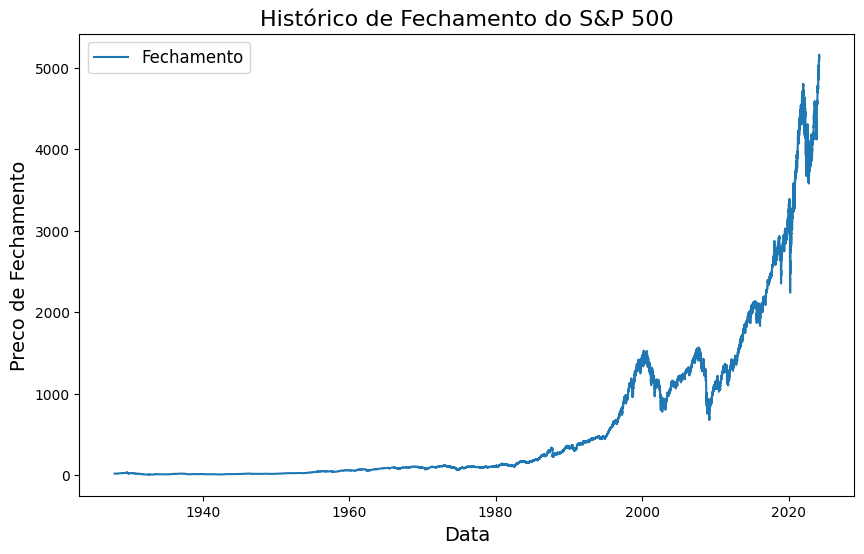

In [9]:
plt.figure(figsize=(10,6))
plt.plot(df.index, df['Close'], label = 'Fechamento')
plt.title('Histórico de Fechamento do S&P 500', fontsize = 16)
plt.xlabel('Data', fontsize = 14)
plt.ylabel('Preco de Fechamento', fontsize = 14)
plt.legend(loc= 'best', fontsize = 12)
plt.show()

In [10]:
del df['Dividends']
del df['Stock Splits']

In [11]:
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0


In [12]:
df.describe()

,Open,High,Low,Close,Volume
count,24162.000000,24162.000000,24162.000000,24162.000000,2.416200e+04
mean,596.930015,620.463544,612.969338,616.959485,8.940373e+08
std,1002.552927,996.979952,985.526121,991.638559,1.609548e+09
min,0.000000,4.400000,4.400000,4.400000,0.000000e+00
25%,9.650000,24.590000,24.590000,24.590000,1.492500e+06
50%,42.099998,102.650002,101.125000,101.935001,1.990000e+07
75%,1002.780014,1009.552505,993.352493,1003.262512,9.214750e+08
max,5164.459961,5189.259766,5128.209961,5157.359863,1.145623e+10


## Engenharia de Atributos

In [13]:
df['Tomorrow'] = df['Close'].shift(-1)

In [14]:
df.tail()

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
2024-03-04 00:00:00-05:00,5130.990234,5149.669922,5127.180176,5130.950195,4758440000,5078.649902
2024-03-05 00:00:00-05:00,5110.520020,5114.540039,5056.819824,5078.649902,4418410000,5104.759766
2024-03-06 00:00:00-05:00,5108.029785,5127.970215,5092.220215,5104.759766,4559050000,5157.359863
2024-03-07 00:00:00-05:00,5132.379883,5165.620117,5128.209961,5157.359863,4137980000,5123.689941
2024-03-08 00:00:00-05:00,5164.459961,5189.259766,5117.500000,5123.689941,4208870000,NaN


In [15]:
df = df.loc['1990-01-01':].copy()

In [16]:
df.head()

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995


In [17]:
df.dropna(inplace = True)

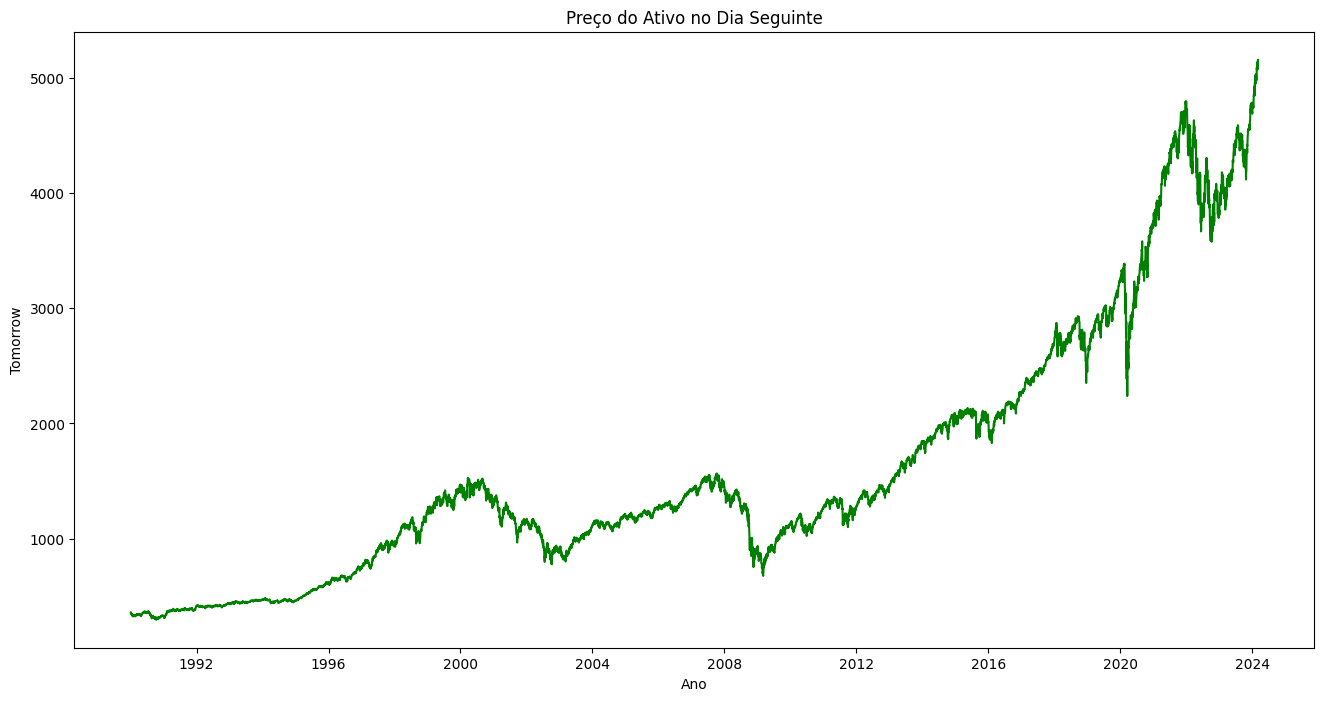

In [18]:
plt.figure(figsize =(16,8))
plt.title('Preço do Ativo no Dia Seguinte')
plt.xlabel('Ano')
plt.ylabel('Tomorrow')
plt.plot(df['Tomorrow'], color = 'green')
plt.show()

## Definindo Variáveis de Entrada e Saída

In [19]:
x = df[['Open', 'High', 'Low', 'Close', 'Volume']]

In [20]:
x

,Open,High,Low,Close,Volume
Date,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000
...,...,...,...,...,...
2024-03-01 00:00:00-05:00,5098.509766,5140.330078,5094.160156,5137.080078,4748110000
2024-03-04 00:00:00-05:00,5130.990234,5149.669922,5127.180176,5130.950195,4758440000
2024-03-05 00:00:00-05:00,5110.520020,5114.540039,5056.819824,5078.649902,4418410000


In [21]:
y = df['Tomorrow']

In [22]:
y

Date
1990-01-02 00:00:00-05:00     358.760010
1990-01-03 00:00:00-05:00     355.670013
1990-01-04 00:00:00-05:00     352.200012
1990-01-05 00:00:00-05:00     353.790009
1990-01-08 00:00:00-05:00     349.619995
                                ...     
2024-03-01 00:00:00-05:00    5130.950195
2024-03-04 00:00:00-05:00    5078.649902
2024-03-05 00:00:00-05:00    5104.759766
2024-03-06 00:00:00-05:00    5157.359863
2024-03-07 00:00:00-05:00    5123.689941
Name: Tomorrow, Length: 8611, dtype: float64

## Preprocessamento dos Dados

In [23]:
X_validation = x.loc['2024-03-07'].copy()
Y_validation = y.loc['2024-03-07'].copy()

In [24]:
x.drop(['2024-03-07'], inplace = True)
y.drop(['2024-03-07'], inplace = True)

In [25]:
X_treino, X_teste, Y_treino, Y_teste = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [26]:
scaler = StandardScaler()

In [27]:
scaler.fit(X_treino)

StandardScaler()

In [28]:
X_treino_scaled = scaler.transform(X_treino)

In [29]:
X_treino_scaled

array([[-1.05116418, -1.05397968, -1.04952749, -1.05202829, -1.20867896],
       [ 0.08437741,  0.07868233,  0.08834851,  0.07923308,  0.36467074],
       [ 2.72180626,  2.72784547,  2.7372494 ,  2.74712657,  0.9981101 ],
       ...,
       [-0.23544557, -0.23875214, -0.23313925, -0.23465214,  0.62291955],
       [-1.03905008, -1.03778101, -1.0357192 , -1.0348584 , -1.19035085],
       [ 1.02003177,  1.02243477,  1.0334965 ,  1.03452557,  0.57839221]])

In [30]:
X_teste_scaled = scaler.transform(X_teste)

In [31]:
X_teste_scaled

array([[-0.9407883 , -0.94295944, -0.9389166 , -0.93949813, -1.18133827],
       [-0.67107647, -0.66959496, -0.66569903, -0.66676677, -1.0867116 ],
       [ 2.66082202,  2.66889155,  2.68448488,  2.68945923,  0.89710537],
       ...,
       [ 0.06780254,  0.06329768,  0.07569772,  0.07000088,  0.08037417],
       [ 0.59277387,  0.59372961,  0.60508731,  0.59967816,  0.75790267],
       [-1.03456239, -1.0374769 , -1.03363938, -1.03571241, -1.18421624]])

## Modelagem Preditiva

In [32]:
modelo = LinearRegression()

In [33]:
modelo.fit(X_treino_scaled, Y_treino)

LinearRegression()

In [34]:
modelo.coef_

array([-1.35813419e+02,  1.91144174e+02,  2.64351162e+02,  7.92699299e+02,
        1.54144448e-01])

In [35]:
modelo.intercept_

1605.0174808923098

In [36]:
y_pred = modelo.predict(X_teste_scaled)

In [37]:
y_pred

array([ 559.4226516 ,  863.47811971, 4595.50264101, ..., 1683.42078661,
       2273.4356058 ,  452.78245673])

In [38]:
print(f'MSE: {metrics.mean_squared_error(Y_teste, y_pred)}')
print(f'RMSE: {np.sqrt(metrics.mean_squared_error(Y_teste, y_pred))}')
print(f'MAE: {metrics.mean_absolute_error(Y_teste, y_pred)}')
print(f'R2: {metrics.r2_score(Y_teste, y_pred)}')

MSE: 489.4230207645771
RMSE: 22.12290714993346
MAE: 12.254267080518845
R2: 0.9996078681281475


In [39]:
df_resultado = pd.DataFrame({'Real':Y_teste, 'Previsto':y_pred, 'Erro':abs(Y_teste - y_pred)})

In [40]:
df_resultado

,Real,Previsto,Erro
Date,,,
1995-08-22 00:00:00-04:00,557.140015,559.422652,2.282637
1997-06-09 00:00:00-04:00,865.270020,863.478120,1.791900
2021-10-28 00:00:00-04:00,4605.379883,4595.502641,9.877242
2000-08-15 00:00:00-04:00,1479.849976,1485.727734,5.877759
2016-02-23 00:00:00-05:00,1929.800049,1923.404593,6.395456
...,...,...,...
2002-08-29 00:00:00-04:00,916.070007,916.345918,0.275911
1990-12-21 00:00:00-05:00,329.899994,332.173940,2.273946
2013-07-15 00:00:00-04:00,1676.260010,1683.420787,7.160777


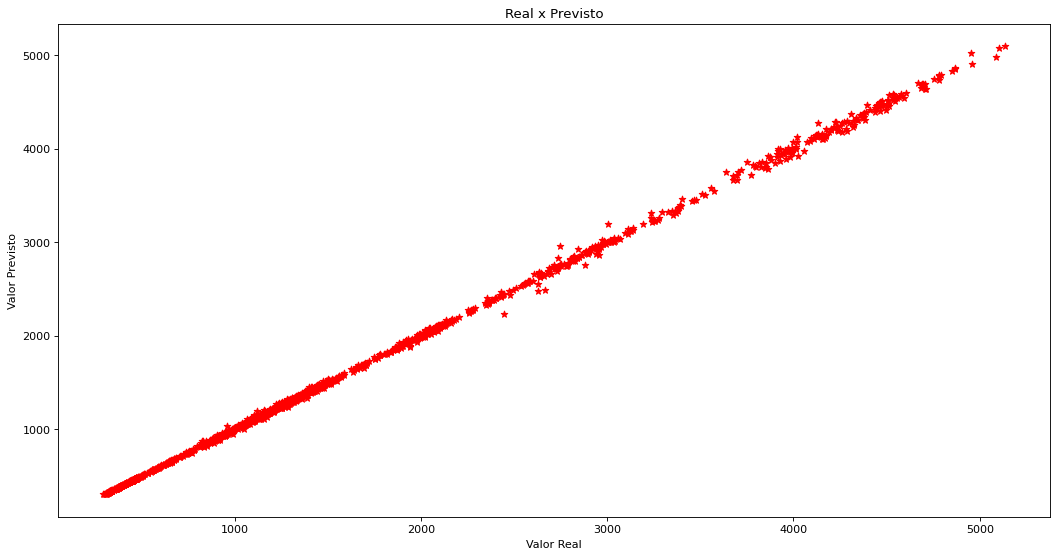

In [41]:
plt.figure(figsize=(16,8), dpi = 80)
plt.scatter(Y_teste, y_pred, color = 'red', marker = '*')
plt.xlabel('Valor Real')
plt.ylabel('Valor Previsto')
plt.title('Real x Previsto')
plt.show()

## Deploy do Modelo

In [72]:
validation = pd.DataFrame({k:[v]for k, v in dict(X_validation).items()})

In [74]:
novos_dados_scaled = scaler.transform(validation)

In [75]:
previsao_tomorrow = modelo.predict(novos_dados_scaled)

In [77]:
print(f'Previsão do valor de fechamento para o próximo dia: {previsao_tomorrow[0]}\n Valor real: {Y_validation}')

Previsão do valor de fechamento para o próximo dia: 5157.9335466340835
 Valor real: 5123.68994140625


In [93]:
dif_percent = ((previsao_tomorrow[0] - Y_validation) / Y_validation) * 100

In [94]:
print(f'Margem de erro de {dif_percent:.2f}%')

Margem de erro de 0.67%
